In [10]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [11]:
# loading the dataset
ds = pd.read_csv(r'C:\Users\Jaya Krishna Sai\Desktop\Python\segcluster\Regression\USA_Housing.csv')

In [12]:
# dropping the address column
ds.drop('Address',axis=1,inplace=True)

In [13]:
# scaling the dataset
scaler = MinMaxScaler()
ds_scaled = pd.DataFrame(scaler.fit_transform(ds),columns=ds.columns)

In [14]:
# assigning the features and target
X = ds_scaled.drop('Price',axis=1)
y = ds_scaled['Price']


In [15]:
# splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [17]:
# performing the regression
GB = XGBRegressor()
GB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
y_pred = GB.predict(X_test)

In [19]:
# printing the metrics
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

Mean Squared Error: 0.002470384356907522
R2 Score: 0.8791671871204554
Mean Absolute Error: 0.03909606665077119


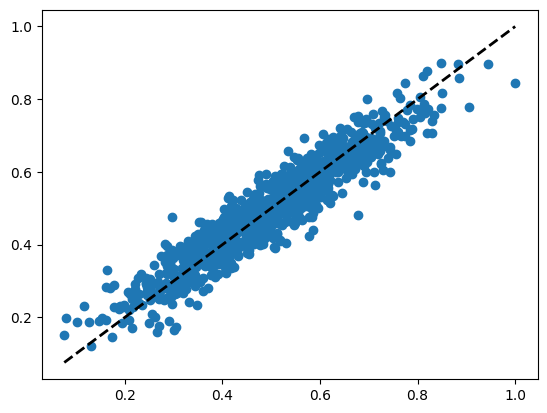

In [22]:
# plotting the results
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)

In [23]:
y_pred1 = GB.predict(X_train)

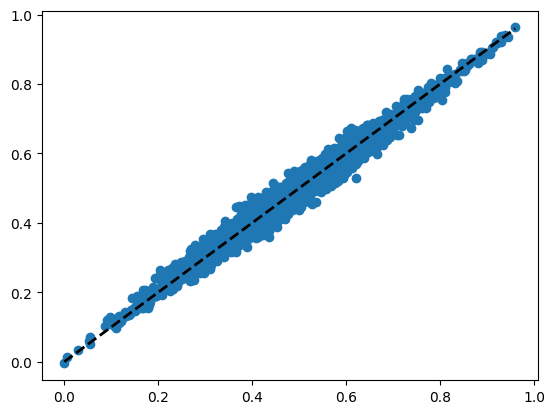

In [24]:
# plotting the results
plt.scatter(y_train,y_pred1)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',lw=2)